<a href="https://colab.research.google.com/github/Vansh-teotia/Assigment1/blob/main/classifying_SGQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow import keras
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

data1 = pd.read_csv("/content/gdrive/MyDrive/Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip")

In [ ]:
data1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
data1.shape

(10000, 18)

In [ ]:
data1.drop(['objid','specobjid'], axis=1, inplace=True)

In [ ]:
data1.head(20)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [ ]:
data1.shape

(10000, 16)

In [ ]:
data1.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [ ]:
le = LabelEncoder().fit(data1['class'])
data1['class'] = le.transform(data1['class'])

In [ ]:
data1.head(20)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


In [ ]:
X = data1.drop('class', axis=1)
y = data1['class']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [ ]:
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)

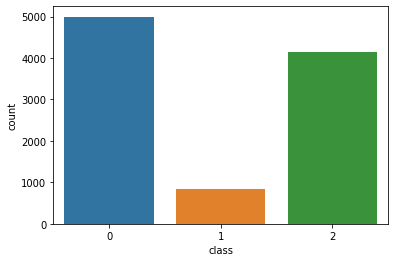

In [ ]:
sns.countplot(x=data1['class'])

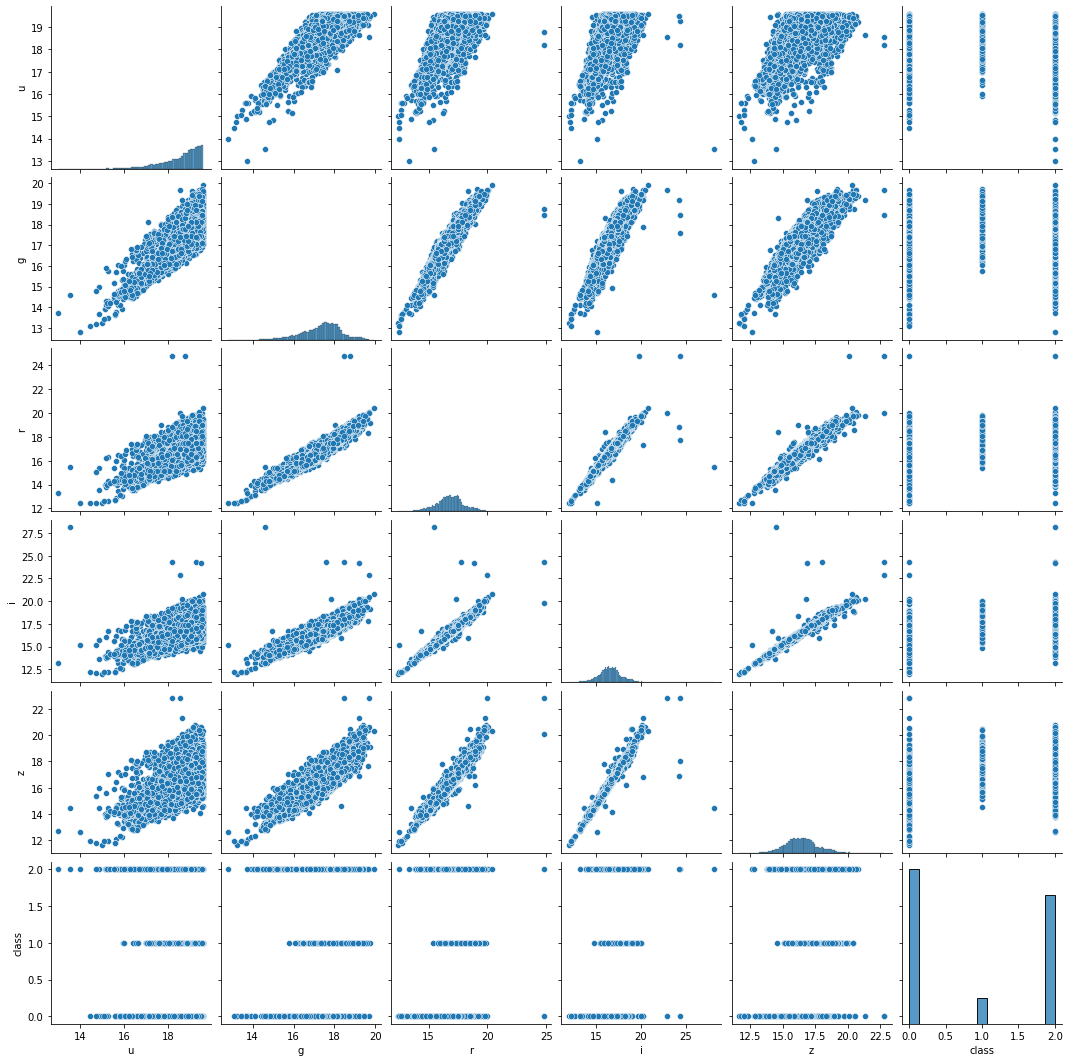

In [ ]:
sns.pairplot(data1[['u','g','r','i','z','class']])

Defining Classifiers 

In [ ]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)
#------------------------------------------------------------------
#Linear Classifiers:
# 1- Logistic Regression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000000)
LRClassifer = log_reg
# # 2-Naive Bayes Classifier
#NBClassifer = MultinomialNB()
#-------------------------------------------------------------------
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)
#-------------------------------------------------------------------
#Support Vector Machines Classifer
SVCModel = SVC()

In [ ]:
dtClassifer.fit(X_train, y_train)
LRClassifer.fit(X_train, y_train)
#NBClassifer.fit(X_train, y_train)
NeNeClassifier.fit(X_train, y_train)
SVCModel.fit(X_train, y_train)


SVC()

In [ ]:
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
#y_predsNB = NBClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)
y_predsSVC = SVCModel.predict(X_test)

In [ ]:
print(y_preds[:10],'\n',y_test[:10])
print("*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])
print("*******************************************************")
#print(y_predsNB[:10],'\n',y_test[:10])
#print("*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])
print("*******************************************************")
print(y_predsSVC[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64
*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64
*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64
*******************************************************
[0 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [ ]:
print('accuracy_score by Decision Tree Classifier:',accuracy_score(y_true=y_test, y_pred=y_preds))
print('accuracy_score by LR Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsLR))
#print('accuracy_score by Naive Bayes Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsNB))
print('accuracy_score by Nearest Neighbor Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsNeNe))
print('accuracy_score by SVM Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsSVC))

accuracy_score by Decision Tree Classifier: 0.988
accuracy_score by LR Classifier: 0.9745
accuracy_score by Nearest Neighbor Classifier: 0.916
accuracy_score by SVM Classifier: 0.959


STACKING Model-1

In [ ]:
from sklearn.ensemble import StackingClassifier


estimators  = [
    ('LRClassifer',LRClassifer),
    ('SVCModel' , SVCModel),
    ('NeNeClassifier' , NeNeClassifier)
     ]

#Building Stack Model

stack_model = StackingClassifier(estimators = estimators , final_estimator=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000000))

#Training Stacked Model
stack_model.fit(X_train, y_train)

#Make Predctions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

#Training set model performance
stack_model_test_accuracy1 = accuracy_score(y_train,y_train_pred)
f1score_train = f1_score(y_train,y_train_pred, average='weighted')
stack_train_recall_score = recall_score(y_train,y_train_pred,average = 'weighted')
stack_train_precision = precision_score(y_train,y_train_pred,average = 'weighted')


#Testing set model performance
stack_model_test_accuracy2 = accuracy_score(y_test,y_test_pred)
f1score_test = f1_score(y_test,y_test_pred, average='weighted')
stack_test_recall_score = recall_score(y_test,y_test_pred,average = 'weighted')
stack_test_precision = precision_score(y_test,y_test_pred,average = 'weighted')

#Evaluation Metrics for training set
print("Accuracy performance for training set:", stack_model_test_accuracy1)
print("f1-score for training set:", f1score_train)
print("recall score of training set is:",stack_train_recall_score)
print("precision score of training set is:",stack_train_precision)

print("------------------------------------------------")

#Evaluation Metrics For Testing Set
print("Accuracy performance for test set:",stack_model_test_accuracy2 )
print("f1-score for testing set:", f1score_test)
print("recall score of testing set is:",stack_test_recall_score)
print("precision score of testing set is:",stack_test_precision)




Accuracy performance for training set: 0.9765
f1-score for training set: 0.9765083683886477
recall score of training set is: 0.9765
precision score of training set is: 0.9767278925895299
------------------------------------------------
Accuracy performance for test set: 0.9755
f1-score for testing set: 0.9755113193848178
recall score of testing set is: 0.9755
precision score of testing set is: 0.9757814075887393


Defining Further Models for stacking

1.)Multi-layer Perceptron classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha = 1, max_iter=20000) #Define Classifier
mlp.fit(X_train, y_train) #Train Model


#Make Predcitions 
nne_y_pred = mlp.predict(X_train)
nne_test_pred = mlp.predict(X_test)

#Training Set Performance
mlp_train_accuracy = accuracy_score(y_train,nne_y_pred)
mlp_train_f1 = f1_score(y_train,nne_y_pred, average = 'weighted')
mlp_train_recall_score = recall_score(y_train,nne_y_pred,average = 'weighted')
mlp_train_precision = precision_score(y_train,nne_y_pred,average = 'weighted')

#Testing Set Performance
mlp_test_accuracy = accuracy_score(y_test,nne_test_pred)
mlp_test_f1 = f1_score(y_test,nne_test_pred, average = 'weighted')
mlp_test_recall_score = recall_score(y_test,nne_test_pred,average = 'weighted')
mlp_test_precision = precision_score(y_test,nne_test_pred,average = 'weighted')

#Evaluation Metrics of NNE model for Training Set
print("Accuracy of training set is:",mlp_train_accuracy)
print("f1 score of training set is:",mlp_train_f1)
print("recall score of training set is:",mlp_train_recall_score)
print("precision score of training set is:",mlp_train_precision)

print("--------------------------------------------------")

#Evaluation Metrics of NNE model for Testing Set
print("Accuracy of testing set is:",mlp_test_accuracy)
print("f1 score of testing set is:",mlp_test_f1)
print("recall score of testing set is:",mlp_test_recall_score)
print("precision score of testing set is:",mlp_test_precision)









Accuracy of training set is: 0.96925
f1 score of training set is: 0.9691835298959443
recall score of training set is: 0.96925
precision score of training set is: 0.9693096054022001
--------------------------------------------------
Accuracy of testing set is: 0.969
f1 score of testing set is: 0.9688952711605354
recall score of testing set is: 0.969
precision score of testing set is: 0.9691153338773291


2.) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10) #Define Classifier
rf.fit(X_train, y_train) #Train Model

#Make Predcitions 
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

#Training Set Performance
rf_train_accuracy = accuracy_score(y_train,rf_train_pred)
rf_train_f1 = f1_score(y_train,rf_train_pred, average = 'weighted')
rf_train_recall_score = recall_score(y_train,rf_train_pred,average = 'weighted')
rf_train_precision = precision_score(y_train,rf_train_pred,average = 'weighted')

#Testing Set Performance 
rf_test_accuracy = accuracy_score(y_test,rf_test_pred)
rf_test_f1 = f1_score(y_test,rf_test_pred, average = 'weighted')
rf_test_recall_score = recall_score(y_test,rf_test_pred,average = 'weighted')
rf_test_precision = precision_score(y_test,rf_test_pred,average = 'weighted')

#Evaluation Metrics of NNE model for Training Set
print("Accuracy of training set is:",rf_train_accuracy)
print("f1 score of training set is:",rf_train_f1)
print("recall score of training set is:",rf_train_recall_score)
print("precision score of training set is:",rf_train_precision)

print("--------------------------------------------------")

#Evaluation Metrics of NNE model for Testing Set
print("Accuracy of testing set is:",rf_test_accuracy)
print("f1 score of testing set is:",rf_test_f1)
print("recall score of testing set is:",rf_test_recall_score)
print("precision score of testing set is:",rf_test_precision)







Accuracy of training set is: 0.9995
f1 score of training set is: 0.9994993688748981
recall score of training set is: 0.9995
precision score of training set is: 0.9995004964010921
--------------------------------------------------
Accuracy of testing set is: 0.989
f1 score of testing set is: 0.9888764528414368
recall score of testing set is: 0.989
precision score of testing set is: 0.9889337531699071


Stacking Model-2

In [ ]:
estimators  = [
    ('SVCModel' , SVCModel),
    ('MLPclassifier' , mlp),
    ('RFclassifier' , rf)
     ]

#Building Stack Model

stack_model2 = StackingClassifier(estimators = estimators , final_estimator=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000000))

#Training Stacked Model
stack_model2.fit(X_train, y_train)

#Make Predctions
y_train_pred1 = stack_model2.predict(X_train)
y_test_pred1 = stack_model2.predict(X_test)

#Training set model performance
stack_model_test_accuracy3 = accuracy_score(y_train,y_train_pred1)
f1score_train3 = f1_score(y_train,y_train_pred1, average='weighted')
stack2_train_recall_score = recall_score(y_train,y_train_pred1,average = 'weighted')
stack2_train_precision = precision_score(y_train,y_train_pred1,average = 'weighted')


#Testing set model performance
stack_model_test_accuracy4 = accuracy_score(y_test,y_test_pred1)
f1score_test4 = f1_score(y_test,y_test_pred1, average='weighted')
stack2_test_recall_score = recall_score(y_test,y_test_pred1,average = 'weighted')
stack2_test_precision = precision_score(y_test,y_test_pred1,average = 'weighted')

#Evaluation Metrics For Training Sets
print("Accuracy performance for training set:", stack_model_test_accuracy3)
print("f1-score for training set:", f1score_train3)
print("recall score of training set is:",stack2_train_recall_score)
print("precision score of training set is:",stack2_train_precision)

print("------------------------------------------")

#Evaluation Metrics for Testing Sets
print("Accuracy performance for test set:",stack_model_test_accuracy4 )
print("f1-score for testing set:", f1score_test4)
print("recall score of testing set is:",stack2_test_recall_score)
print("precision score of testing set is:",stack2_test_precision)

Accuracy performance for training set: 0.995875
f1-score for training set: 0.9958916582742735
recall score of training set is: 0.995875
precision score of training set is: 0.9959261564457292
------------------------------------------
Accuracy performance for test set: 0.9895
f1-score for testing set: 0.9894384023839984
recall score of testing set is: 0.9895
precision score of testing set is: 0.9894508002572331


CLASSIFICATION REPORTS


For Stacked Model-2

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, y_test_pred1 , target_names=target_names))



              precision    recall  f1-score   support

       STARS       0.99      0.99      0.99       973
    GALAXIES       0.98      0.94      0.96       186
     QUASARS       0.99      1.00      1.00       841

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



For Stacked Model-1

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, y_test_pred , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.99      0.97      0.98       973
    GALAXIES       0.95      0.97      0.96       186
     QUASARS       0.97      0.99      0.98       841

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000



For Logistic Regression Classifier

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, y_predsLR , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.99      0.96      0.98       973
    GALAXIES       0.96      0.96      0.96       186
     QUASARS       0.96      0.99      0.98       841

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



For Decision Tree Classifier

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, y_preds , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.98      0.99      0.99       973
    GALAXIES       0.97      0.92      0.95       186
     QUASARS       1.00      1.00      1.00       841

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



For Nearest Neighbour Classifier

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, y_predsNeNe , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.89      0.95      0.92       973
    GALAXIES       0.97      0.88      0.92       186
     QUASARS       0.93      0.89      0.91       841

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.92      2000
weighted avg       0.92      0.92      0.92      2000



For Support Vector Classifier

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, y_predsSVC , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.95      0.97      0.96       973
    GALAXIES       0.99      0.92      0.95       186
     QUASARS       0.96      0.96      0.96       841

    accuracy                           0.96      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000



For Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, rf_test_pred , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.99      0.99      0.99       973
    GALAXIES       0.98      0.92      0.95       186
     QUASARS       1.00      1.00      1.00       841

    accuracy                           0.99      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



For Multilayer Perception Classifier

In [ ]:
from sklearn.metrics import classification_report
target_names = ['STARS', 'GALAXIES', 'QUASARS']
print(classification_report(y_test, nne_test_pred , target_names=target_names))


              precision    recall  f1-score   support

       STARS       0.97      0.97      0.97       973
    GALAXIES       0.98      0.91      0.94       186
     QUASARS       0.97      0.98      0.97       841

    accuracy                           0.97      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.97      0.97      0.97      2000



Box Plots

In [ ]:
Models = ["DecTree","DecTree","DecTree","LogReg","LogReg","LogReg","KNN","KNN","KNN","SVM","SVM","SVM","Stack1","Stack1","Stack1","Stack2","Stack2","Stack2","MLP","MLP","MLP","Randforest","Randforest","Randforest"]
Precision = [0.98,0.97,1.00,0.99,0.96,0.96,0.89,0.97,0.93,0.95,0.99,0.96,0.99,0.95,0.97,0.99,0.98,0.99,0.97,0.98,0.97,0.99,0.98,1.00]
Recall = [0.99,0.92,1.00,0.96,0.96,0.99,0.95,0.88,0.89,0.97,0.92,0.96,0.97,0.97,0.99,0.99,0.94,1.00,0.97,0.91,0.98,0.99,0.92,1.00]
F1 = [0.99,0.95,1.00,0.99,0.95,1.00,0.92,0.92,0.91,0.96,0.95,0.96,0.96,0.98,0.96,0.99,0.96,1.00,0.97,0.94,0.97,0.99,0.95,1.00]
Macro_avg = [0.98,0.97,0.98,0.97,0.97,0.97,0.93,0.90,0.92,0.97,0.95,0.96,0.97,0.97,0.97,0.99,0.98,0.98,0.97,0.95,0.96,0.99,0.97,0.98]
Weighted_avg = [0.99,0.99,0.99,0.97,0.97,0.97,0.92,0.92,0.92,0.96,0.96,0.96,0.98,0.98,0.98,0.99,0.99,0.99,0.97,0.97,0.97,0.99,0.99,0.99]

Evaluation = pd.DataFrame([Models,Precision,Recall,F1,Macro_avg,Weighted_avg],index = ["Models","Precision","Recall","F1","Macro_avg","Weighted_avg"])
Evaluation = Evaluation.T
Evaluation

,Models,Precision,Recall,F1,Macro_avg,Weighted_avg
0,DecTree,0.98,0.99,0.99,0.98,0.99
1,DecTree,0.97,0.92,0.95,0.97,0.99
2,DecTree,1.0,1.0,1.0,0.98,0.99
3,LogReg,0.99,0.96,0.99,0.97,0.97
4,LogReg,0.96,0.96,0.95,0.97,0.97
5,LogReg,0.96,0.99,1.0,0.97,0.97
6,KNN,0.89,0.95,0.92,0.93,0.92
7,KNN,0.97,0.88,0.92,0.9,0.92
8,KNN,0.93,0.89,0.91,0.92,0.92
9,SVM,0.95,0.97,0.96,0.97,0.96


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'f1 score')

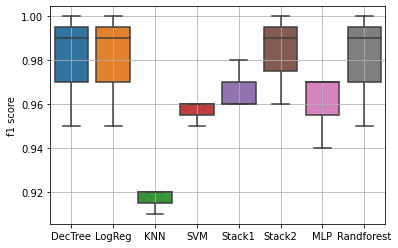

In [ ]:
sns.boxplot(Models,F1,data=Evaluation)
plt.grid()
plt.ylabel("f1 score")



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Recall')

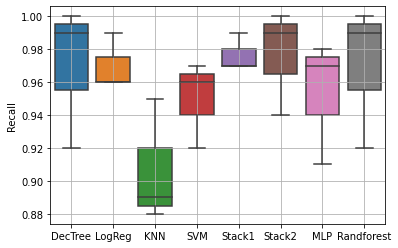

In [ ]:
sns.boxplot(Models,Recall,data=Evaluation)
plt.grid()
plt.ylabel("Recall")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Precision')

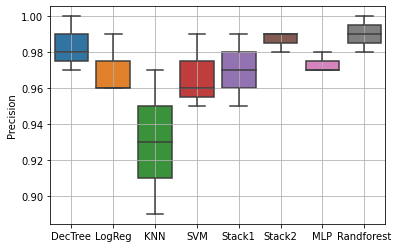

In [ ]:
sns.boxplot(Models,Precision,data=Evaluation)
plt.grid()
plt.ylabel("Precision")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Macro_avg')

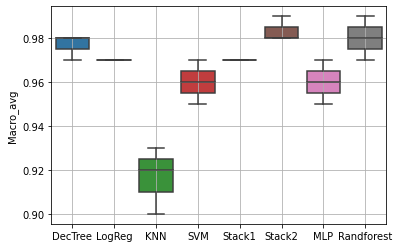

In [ ]:
sns.boxplot(Models,Macro_avg,data=Evaluation)
plt.grid()
plt.ylabel("Macro_avg")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Weighted_avg')

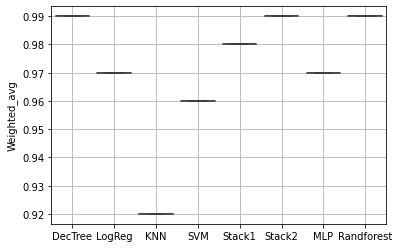

In [ ]:
sns.boxplot(Models,Weighted_avg,data=Evaluation)
plt.grid()
plt.ylabel("Weighted_avg")